In [22]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
train = pd.read_csv('/home/pranay/portfolio/house/trainHouse.csv')

In [17]:
train.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [19]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


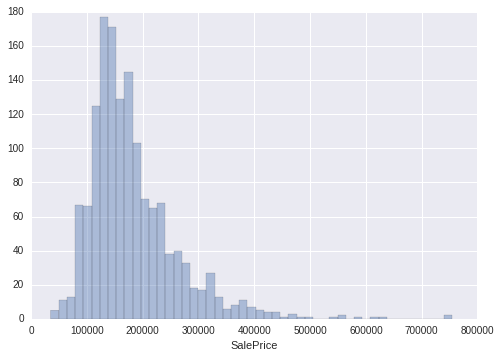

In [23]:
#Distribution of sale price
sns.distplot(train.SalePrice, kde=False)

In [25]:
import xgboost as xgb

In [58]:
##convert float64 to float32
for c, dtype in zip(train.columns, train.dtypes):
    if dtype == np.float64:
        train[c] = train[c].astype(np.float32)

In [66]:
train_dummies = pd.get_dummies(train)

In [69]:
x_train = train_dummies.drop(['Id', 'SalePrice'], axis=1)
y_train = train_dummies.SalePrice.values

In [70]:
split = 876

In [71]:
x_train, y_train, x_valid, y_valid = x_train[:split], y_train[:split], x_train[split:], y_train[split:]

In [72]:
import unittest
#test their shapes
assert(x_train.shape[0] + x_valid.shape[0] == train.shape[0])

In [73]:
d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)

In [74]:
params = {}
params['eta'] = 0.02
params['objective'] = 'reg:linear'
params['eval_metric'] = 'mae'
params['max_depth'] = 4
params['silent'] = 1

In [75]:
watchlist = [(d_train, 'train'), (d_valid, 'valid')]

In [76]:
clf = xgb.train(params, d_train, 10000, watchlist, early_stopping_rounds=100, verbose_eval=10)

[0]	train-mae:179491	valid-mae:174140
Multiple eval metrics have been passed: 'valid-mae' will be used for early stopping.

Will train until valid-mae hasn't improved in 100 rounds.
[10]	train-mae:147134	valid-mae:142583
[20]	train-mae:120636	valid-mae:116698
[30]	train-mae:98966.6	valid-mae:95477.5
[40]	train-mae:81295.3	valid-mae:78181.5
[50]	train-mae:66869.2	valid-mae:64167.6
[60]	train-mae:55084.1	valid-mae:52896.6
[70]	train-mae:45538.4	valid-mae:43856.2
[80]	train-mae:37887.7	valid-mae:36870.7
[90]	train-mae:31726.4	valid-mae:31673.6
[100]	train-mae:26814.4	valid-mae:27811
[110]	train-mae:22959.2	valid-mae:24945.4
[120]	train-mae:19947.7	valid-mae:22882.8
[130]	train-mae:17635.6	valid-mae:21419.4
[140]	train-mae:15932.3	valid-mae:20411.2
[150]	train-mae:14603.9	valid-mae:19664.9
[160]	train-mae:13591.7	valid-mae:19135.4
[170]	train-mae:12803.8	valid-mae:18742.6
[180]	train-mae:12180	valid-mae:18465.4
[190]	train-mae:11680.6	valid-mae:18256.2
[200]	train-mae:11289.4	valid-mae:180